In [1]:
import pathlib
import subprocess
import glob
import os.path
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
PRJ='PRJNA573298'
PRJ_OUT_PATH=f'/mnt/1TB_0/Data/Assembly/{PRJ}/'
BASE_PATH=f'/mnt/6TB_0/Data/genbank/{PRJ}/'

REF_NAME='mitochondria_mamals_1.fa'
REF_PATH='/mnt/1TB_0/Data/fasta/combined/indexed/'

BOWTIE_REF=REF_PATH+REF_NAME.split('.fa')[0]+'_bowtie2'

NUM_THREADS=8
LAYOUT='PAIRED'
KEEP_UNALIGNED=False
CREATE_FASTP=False

ALIGN_OPTS_NAME='local_G_298_0'
ALIGN_OPTS='--local --score-min G,298,0' 

ALIGN_NAME=REF_NAME.split('.fa')[0]
BAMSTATS_POST=f'_{ALIGN_NAME}_{ALIGN_OPTS_NAME}_bamstats.txt'
BAM_POST=f'_reads_fastp_{REF_NAME.split(".fa")[0]}_{ALIGN_OPTS_NAME}_bowtie2_gatk_sorted_marked.bam'

In [3]:

SRAs=['SRR10168373', 'SRR10168374','SRR10168375', 'SRR10168376','SRR10168377', 'SRR10168378',\
      'SRR10168379','SRR10168380','SRR10168381','SRR10168382','SRR10168383',\
      'SRR10168384','SRR10168385', 'SRR10168386','SRR10168387','SRR10168388',\
      'SRR10168389','SRR10168390','SRR10168391','SRR10168392','SRR10168393']


In [4]:
def create_bed(fasta_file, bed_file):
    cmd=f'faidx --transform bed {fasta_file} > {bed_file}'
    subprocess.check_call(cmd, shell=True)

In [5]:
def run_bamdst(bed_file, out_path, bam_in):
    cmd=f'/mnt/1TB_0/Data/Code/external/bamdst/bamdst -p {bed_file} -o {out_path} {bam_in}'
    subprocess.check_call(cmd, shell=True)

In [6]:
def run_bamstats(bam_file, stats_out):
    
    cmd=f'java -jar ~/apps/BAMStats-1.25/BAMStats-1.25.jar -i {bam_file} -m -q -o {stats_out}'
    subprocess.check_call(cmd, shell=True)

In [7]:
def workflow_bamdst():
    bed_file='/mnt/1TB_0/Data/fasta/combined/bed/'+REF_NAME.split('.fa')[0]+'.bed'
    ref=REF_NAME.split('.fa')[0]
    for idx, sra in enumerate(SRAs):
        bwa_path=PRJ_OUT_PATH+sra+'/bowtie2/'
        #SRR10168373_reads_mitochondria_mamals_1_local_G_298_0_bowtie2_gatk_sorted_marked.bam
        bam_file= f"{bwa_path}{sra}_reads_{ref}_{ALIGN_OPTS_NAME}_bowtie2_gatk_sorted_marked.bam"
        out_path=bwa_path+f'bamdst_reads_{ref}_{ALIGN_OPTS_NAME}/'
        print(out_path)
        if not os.path.isfile(out_path):
            pathlib.Path(out_path).mkdir(exist_ok=True)
        run_bamdst(bed_file, out_path, bam_file)

In [8]:
#workflow_bamdst()

In [9]:
def read_bamdsts():
    bed_file='/mnt/1TB_0/Data/fasta/combined/bed/'+REF_NAME.split('.fa')[0]+'.bed'
    ref=REF_NAME.split('.fa')[0]
    frames=[]
    for idx, sra in enumerate(SRAs):
        bwa_path=PRJ_OUT_PATH+sra+'/bowtie2/'
        #SRR10168373_reads_mitochondria_mamals_1_local_G_298_0_bowtie2_gatk_sorted_marked.bam
        bam_file= f"{bwa_path}{sra}_reads_{ref}_{ALIGN_OPTS_NAME}_bowtie2_gatk_sorted_marked.bam"
        out_path=bwa_path+f'bamdst_reads_{ref}_{ALIGN_OPTS_NAME}/'
        stats_df=pd.read_csv(out_path+"chromosomes.report", sep='\t')
        stats_df['SRA']= [sra]*len(stats_df)
        frames.append(stats_df)
    return frames

In [10]:
frames=read_bamdsts()

In [11]:
len(frames)

21

In [12]:
frames[1]

,#Chromosome,DATA(%),Avg depth,Median,Coverage%,Cov 4x %,Cov 10x %,Cov 30x %,Cov 100x %,SRA
0,NC_005943.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
1,MT335859.1,0.01,0.02,0.0,0.90,0.00,0.00,0.00,0.00,SRR10168374
2,NC_012920.1,1.43,2.01,0.0,38.95,14.85,5.00,1.08,0.00,SRR10168374
3,NC_053269.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
4,MN816163.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
5,MK251046.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
6,KP257597.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
7,MW549038.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
8,KY018919.1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,SRR10168374
9,MG196309.1,98.56,138.68,0.0,23.45,13.57,11.05,10.45,9.47,SRR10168374


In [13]:
df = pd.concat(frames, ignore_index=True)

In [14]:
len(df)

231

In [15]:
df['#Chromosome'] = df['#Chromosome'].str.strip()
cols=df.columns

In [16]:
str_cols=[]
for col in enumerate(cols):
    str_cols.append(col[1].strip())
df.columns=str_cols

In [33]:
def plot_df(df, out_path, l_ref, colours):
    fig = plt.figure(figsize=(12,5)) 

    ax = fig.add_subplot(111) 
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    width = 0.4

    df.plot(x="SRA", y="DATA(%)", kind='bar', color=colours[0], ax=ax, width=width, position=1)
    df.plot(x="SRA", y="Coverage%", kind='bar', color=colours[1], ax=ax2, width=width, position=0)

    ax.set_ylabel('DATA(%)')
    ax.legend(loc='upper left')
    ax2.set_ylabel("Coverage%")
    ax2.legend(loc='upper right')
    

    plt.title(l_ref+' mitochondrion alignment')
    plt.savefig(out_path, dpi=100, bbox_inches='tight')

In [34]:
def workflow(mitos, df):
    
    ref=REF_NAME.split('.fa')[0]
    plot_path=PRJ_OUT_PATH+'general_plots/'
    colours=[['teal', 'goldenrod'], ['royalblue', 'orangered'], ['seagreen', 'mediumorchid']]
    for i, l_ref in enumerate(mitos):
        df_single=df.loc[df['#Chromosome']==l_ref]
        out_path=plot_path+f'bamdst_reads_{ref}_{ALIGN_OPTS_NAME}_{l_ref}.png'
        plot_df(df_single, out_path, l_ref, colours[i])

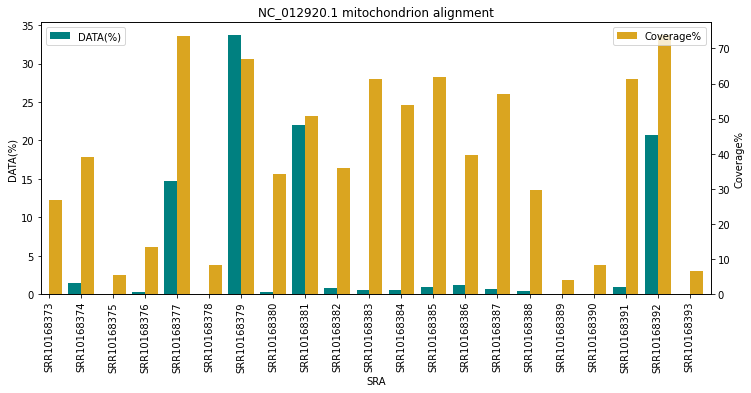

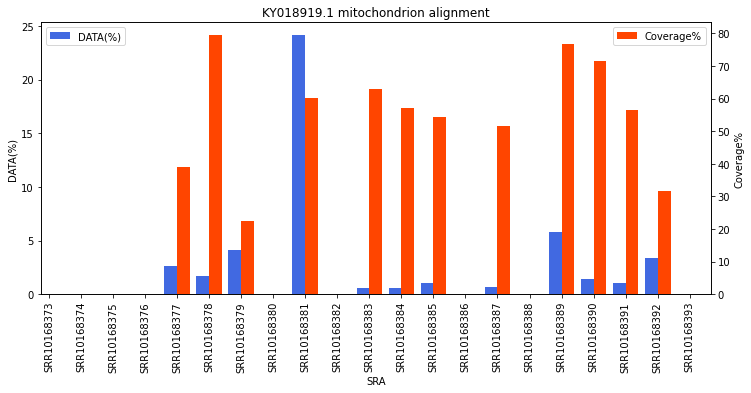

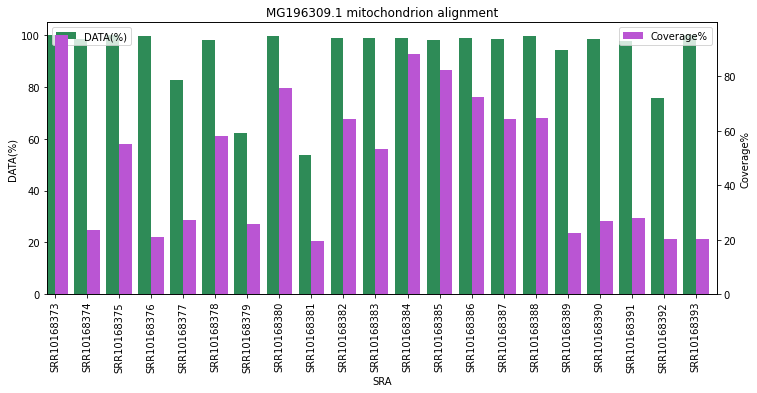

In [36]:
mitos=['NC_012920.1', 'KY018919.1', 'MG196309.1']
df_basic=df.loc[df['#Chromosome'].isin(['NC_012920.1', 'KY018919.1', 'MG196309.1'])]
workflow(mitos, df_basic)